In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 02:33:19 2015

@author: nymph
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
############################## Your code for loading and preprocess the data ##
df = pd.read_csv('exdata_data_household_power_consumption.zip', delimiter=';')
df = df[(df['Date'] == '1/2/2007') + (df['Date'] == '2/2/2007')].reset_index(drop=True)
df.iloc[:,2:] = df.iloc[:,2:].astype('float64')
# df.Date = pd.to_datetime(df.Date)
df

C:\Users\ACER\AppData\Local\Temp\ipykernel_11148\1271799571.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('exdata_data_household_power_consumption.zip', delimiter=';')
C:\Users\ACER\AppData\Local\Temp\ipykernel_11148\1271799571.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2:] = df.iloc[:,2:].astype('float64')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


In [86]:
############################ Complete the following 4 functions ###############
def plot1():
    plt.hist(df.Global_active_power, bins=np.arange(0, int(df.Global_active_power.max())+0.1, 0.5), edgecolor='black')
    plt.title("Global Active Power")
    plt.xlabel("Global Active Power (kilowatts)")
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.savefig('plot1.png')
    plt.show()

def line_plot(plt, attribute):
    time = pd.to_datetime(df.Date + ' ' + df.Time, dayfirst=True)
    hour = time.apply(lambda t: (t - time[0]).total_seconds()/3600)

    if type(attribute) != list:
        plt.plot(hour, df[attribute])
        plt.ylabel(attribute)
    else:
        for attr in attribute:
            plt.plot(hour, df[attr], label=attr)
        plt.ylabel("Energy Sub Metering")
        plt.legend()

    plt.xlabel(f"Hour (from {time[0]})")
    plt.xticks(hour[::60])
    return plt

def plot2():
    plt.figure().set_figwidth(15)
    plot = line_plot(plt, 'Global_active_power')
    plot.savefig('plot2.png')
    plot.show()

def plot3():
    plt.figure().set_figwidth(15)
    plot = line_plot(plt, [f"Sub_metering_{i+1}" for i in range(3)])
    plot.savefig('plot3.png')
    plot.show()

def plot4():
    plt.figure(figsize=(30,10))
    plt.tight_layout()
    
    plt.subplot(2,2,1)
    line_plot(plt, 'Global_active_power')
    plt.subplot(2,2,2)
    line_plot(plt, 'Voltage')
    plt.subplot(2,2,3)
    line_plot(plt, [f"Sub_metering_{i+1}" for i in range(3)])
    plt.subplot(2,2,4)
    plot = line_plot(plt, 'Global_reactive_power')

    plot.savefig('plot4.png')
    plot.show()


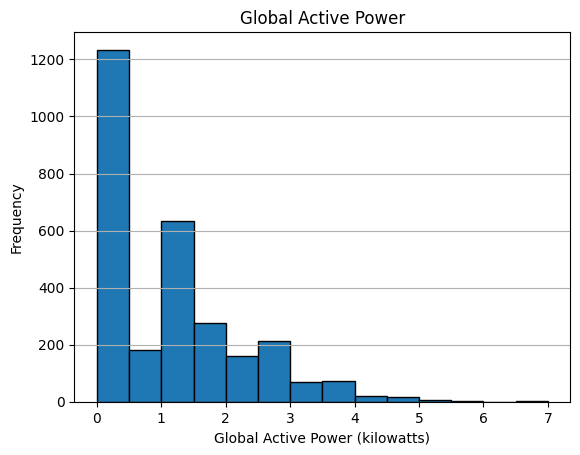

In [82]:
plot1()

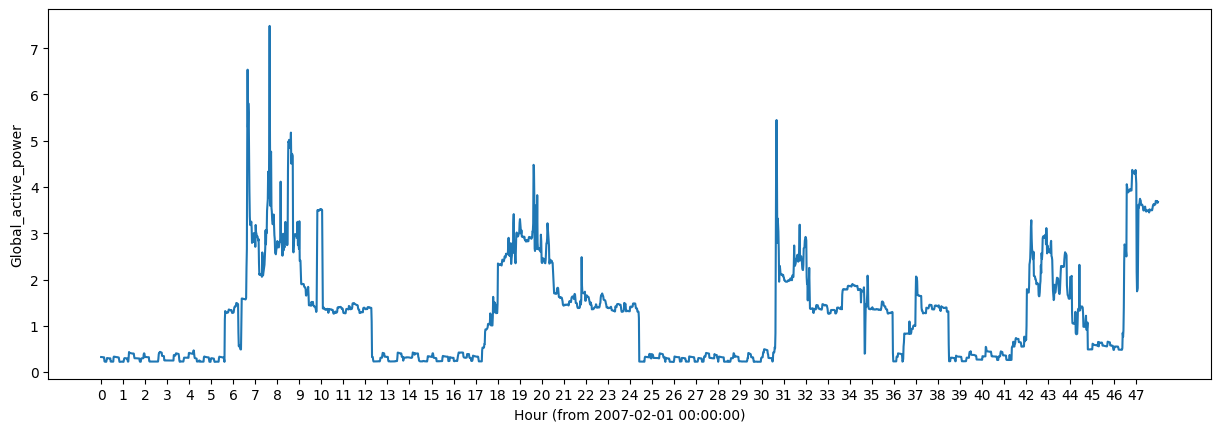

In [83]:
plot2()

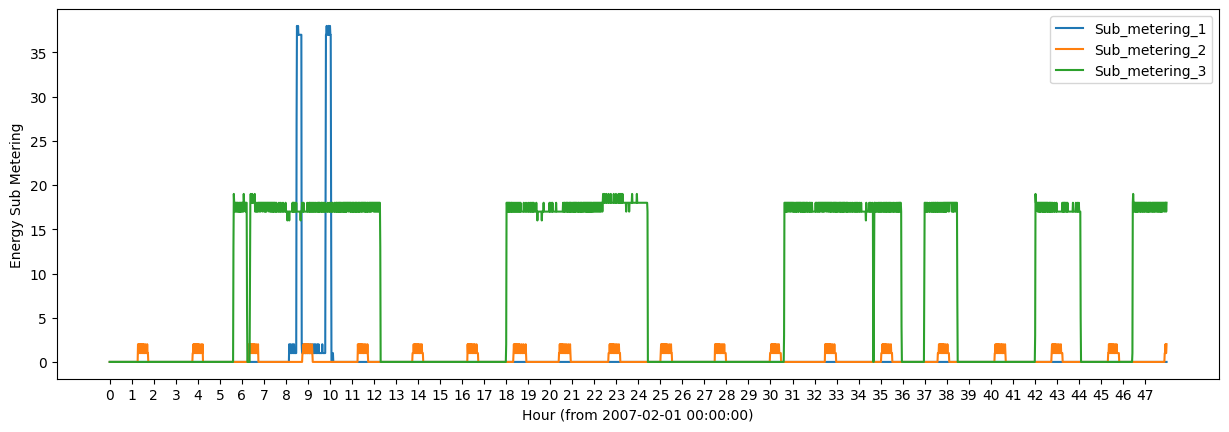

In [84]:
plot3()

<Figure size 640x480 with 0 Axes>

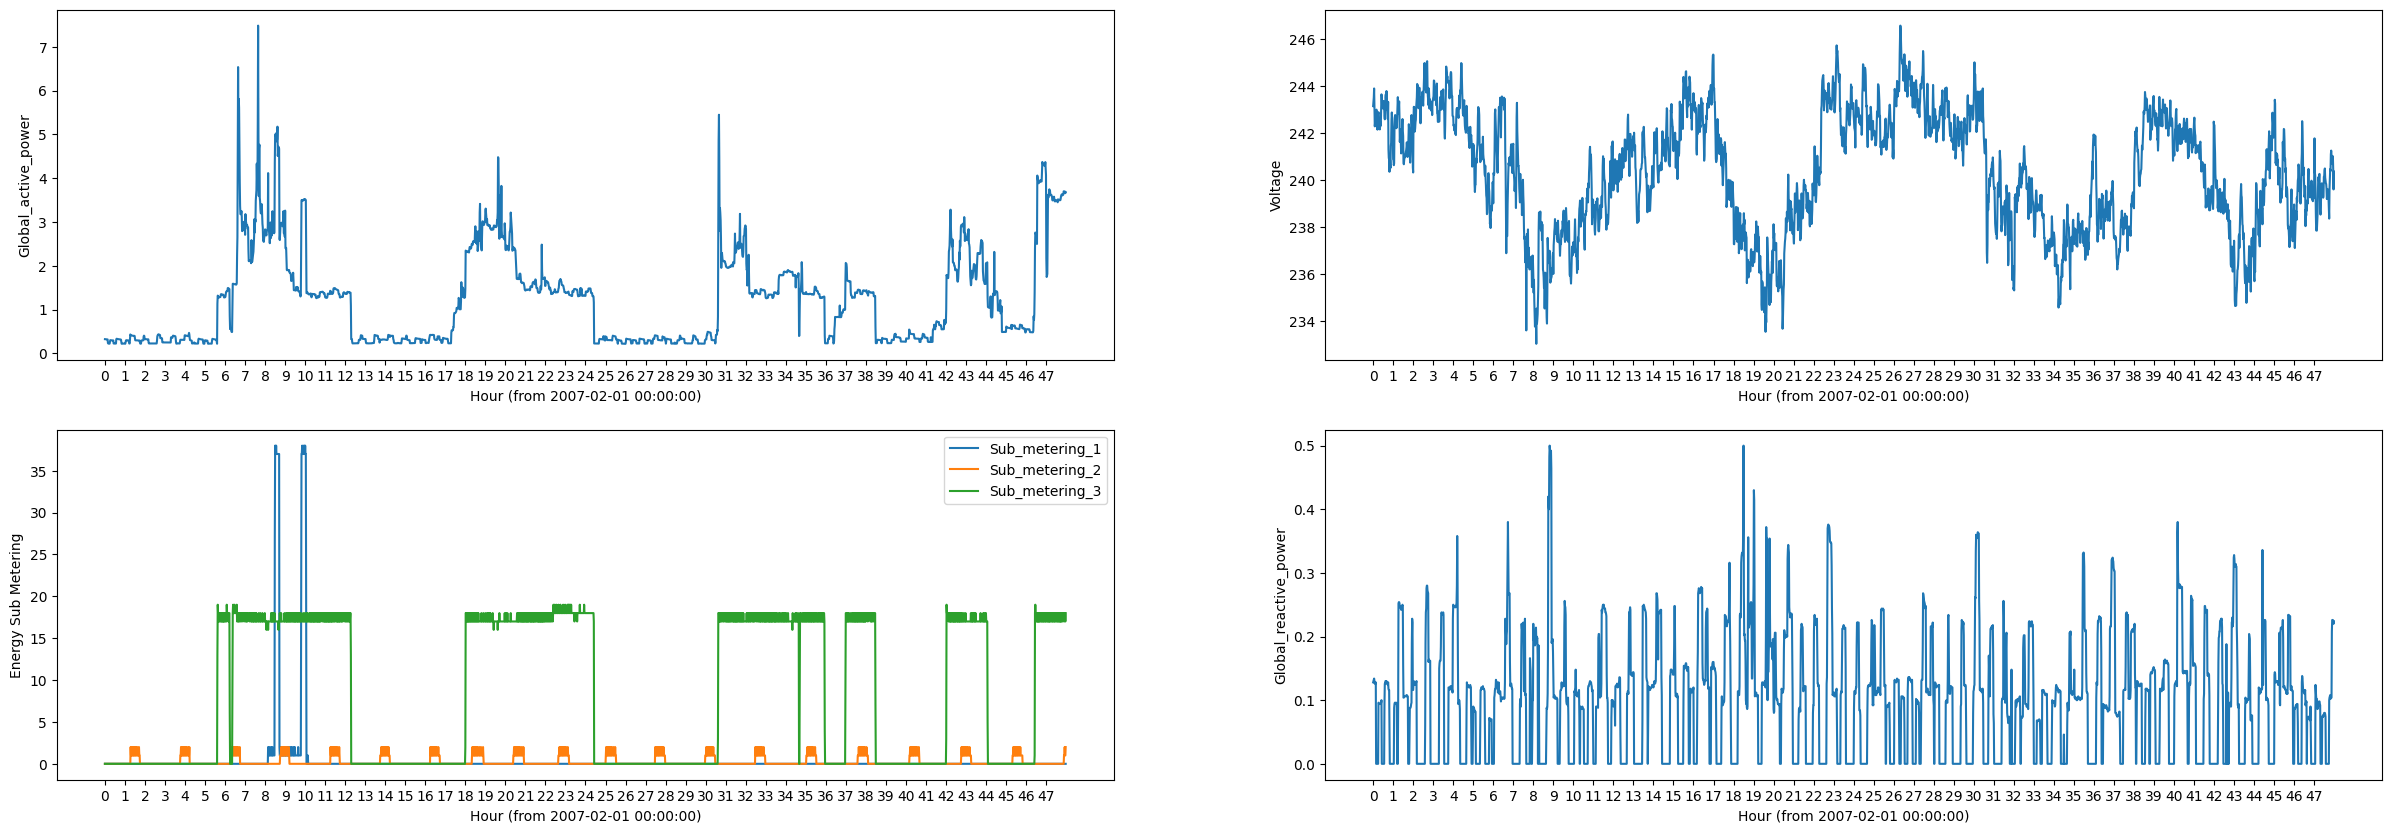

In [85]:
plot4()